In [1]:
sxz = "50. 0."
data_path = "data/vibro_seis/"
%run 2d_vibro/vibro_seis_elastic.py 50. 0. "../data/vibro_seis/recorders.txt" -gpu

Operator `initdamp` ran in 0.09 s


(110, 114) (np.float32(1.0), np.float32(1.0))
(64958, 1)


Operator `ForwardElastic` ran in 3.03 s


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scratch.util import plot_seis_data
from scratch.devito_shared import gen_sweep 

In [2]:
with np.load("../results/vibro_elastic/vibro_full.npz") as f:
    data = f['data']
    dt = f['dt']
    sweep = f['sweep']
    rec_coords = np.loadtxt("../data/vibro_seis/recorders.txt")
    hits = gen_sweep(range(sweep.shape[0])*dt, [0.02,0.05])

In [ ]:
split = np.arange(int(1000/dt), data.shape[0]- int(1000/dt), int(1000/dt))
data_s = np.split(data, split)
sweep_s = np.split(sweep, split)

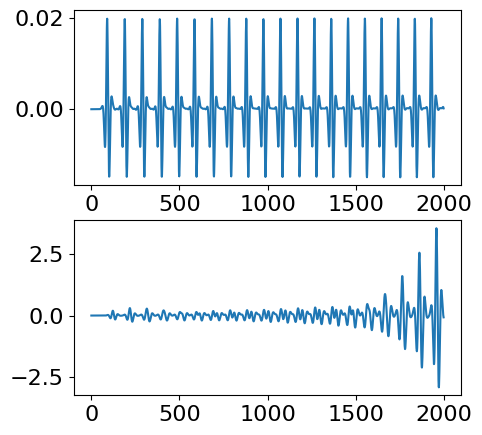

In [18]:
fig, axs = plt.subplots(2,1, figsize = (5,5))
axs[0].plot(data_s[0][:,10])
axs[1].plot(np.correlate(data_s[0][:,10], sweep_s[0], mode='full')[:data_s[0][:,10].shape[0]])

In [ ]:
data_crl=[]
for i in range(len(data_s)):
    data_crl.append(np.apply_along_axis(np.correlate(), 1, data_s[i], sweep_s[i], mode))

array([2.039589], dtype=float32)

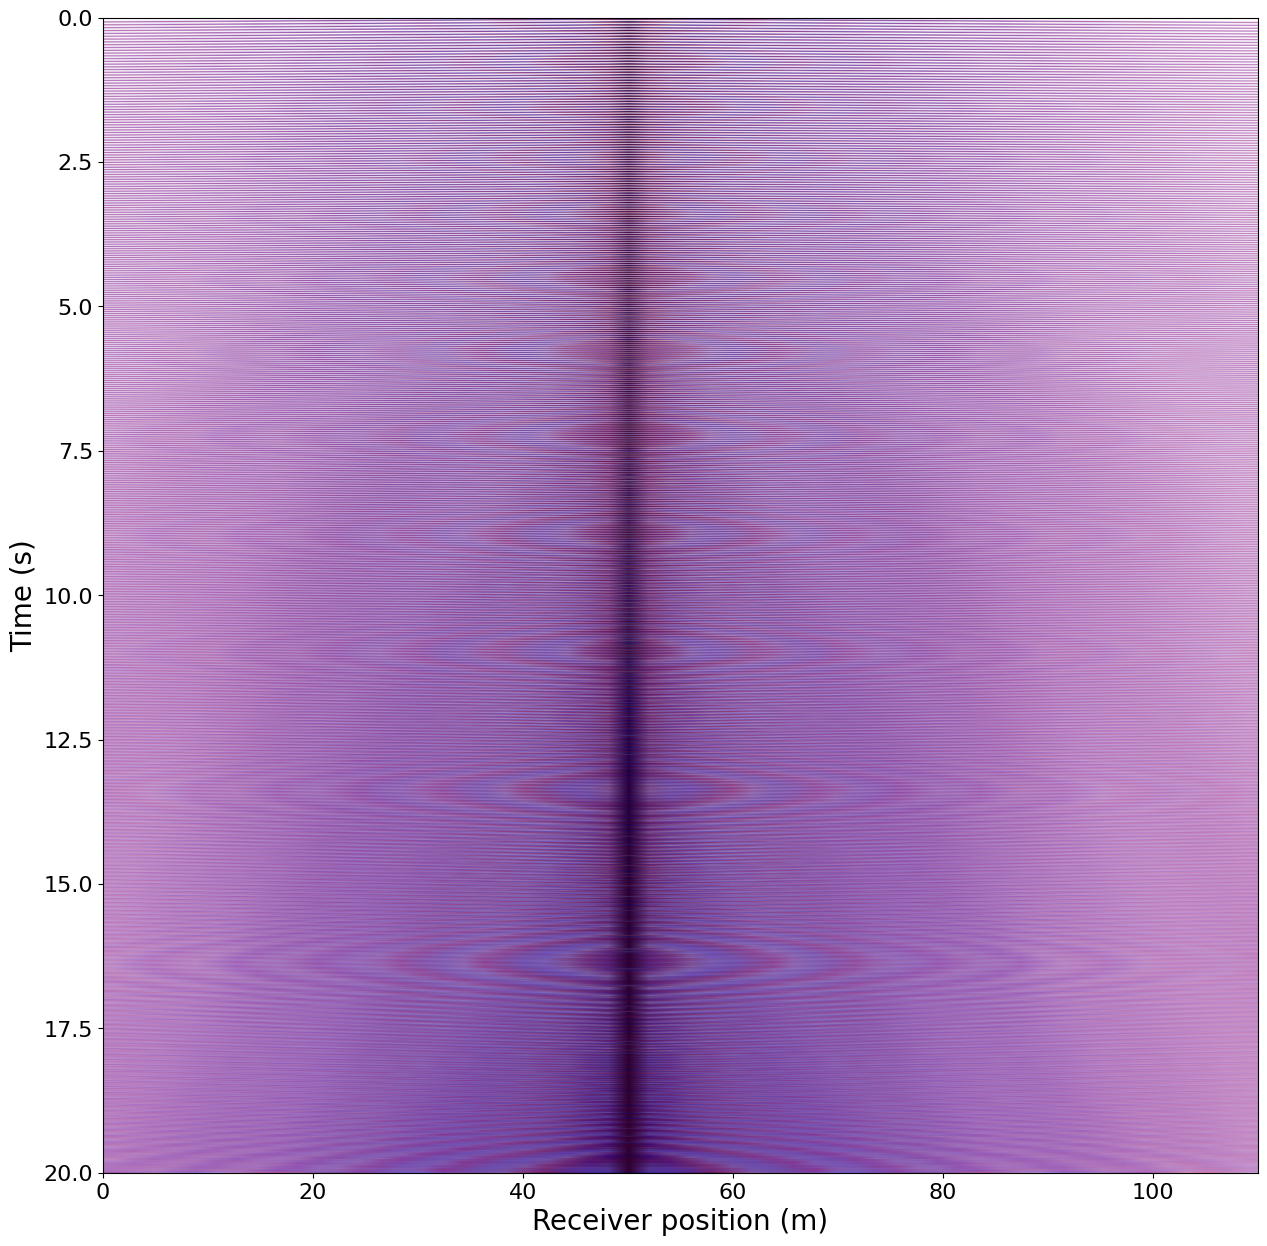

In [14]:
plot_seis_data(rec_coords, data, 0, 20000)